# Experiments

In [ ]:
from environments import MontyHallEnv, MontyHallDiscreteWrapper
from src.rl import QLearningConfig, QLearningAgent

import os
import gymnasium as gym
import wandb
import numpy as np
import matplotlib.pyplot as plt

# Environments defined with Gymnasium
Recall that Reinforcement Learning needs an environment to act in. It takes actions in this environment, learning what the optimal action is for each environment state it observes based on a reward it receives. Environments are independent of the algorithm being used.

`Gymnasium` (https://gymnasium.farama.org/index.html) is the most popular library for defining environment classes and provides a lot of helpful wrappers, as well as an unified and clearly defined interface that all environments follow. It is a fork (continuation) of OpenAI's `Gym`, note that the original `Gym` is no longer maintained by anyone. Sometimes, people refer to `Gym` when they mean `Gymnasium` as a shorthand, or in older posts/literature used `Gym` when it was the main library.

Here, we intend to run the environment initially, to get a feel for how our implemented algorithm (Tabular Q Learning) works in practice with the Gymnasium interface on a provided environment, Monty Hall.

# Monty Hall environment
The Monty Hall is a well-known problem that originated from a game show, it can be stated as follows:
> Suppose you're on a game show, and you're given the choice of three doors: Behind one door is a car; behind the others, goats. You pick a door, say No. 1, and the host, who knows what's behind the doors, opens another door, say No. 3, which has a goat. He then says to you, "Do you want to pick door No. 2?" Is it to your advantage to switch your choice?

<p align="center">
  <img src="assets/monty_hall.png" alt="Monty Hall Environment" />
</p> 

Overall in this notebook, our aim is to learn whether it is optimal or not to actually switch or remain. We can see this by rolling out our policy.

You can also play this environment yourself in the notebook: `notebooks/extra/play_monty_hall.ipynb` before proceeding here.

## Creating the configuration for the algorithm, an agent class, and instantiating the environment

In [ ]:
# 1) Let us create a default config and default Q Learning Agent
config = QLearningConfig(
    learning_rate=0.1,
    discount_factor=0.99,
    epsilon_start=1.0,
    epsilon_decay=0.9985,
    epsilon_min=0.05,
    max_steps_per_episode=100,
    video_dir="exports/monty_hall",
)

# 2) Create an instance of the Monty Hall environment
env = gym.make(
    "MontyHall-v0",
    n_doors=3,
    n_cars=1,
    render_mode="rgb_array",
)

# 2a) Tabular Q Learning requires a Discrete action space: not MultiDiscrete
env = MontyHallDiscreteWrapper(env)

# 3) An instance of Tabular Q Learning
agent = QLearningAgent(env, config)

# 4) Train for 500 episodes
num_episodes = 500
episode_rewards, converged_episode, converged_time = agent.train(
    episodes=num_episodes,
    log_interval=10,
)

# 4) Print out what happened each episode
for i, r in enumerate(episode_rewards, start=1):
    print(f"Episode {i:2d} → Reward: {r:+.1f}")

if converged_episode != -1:
    print(f"\nConverged at episode {converged_episode} after {converged_time:.2f}s")
else:
    print("\nDid not converge within 10 episodes.")

# 5) See the policy
print("\nRunning 10 test episodes with the trained policy:")
agent.test(episodes=10)

env.close()

c:\Projects\amethyst\Solving-Combinatorial-Problems-using-Reinforcement-Learning\.venv\Lib\site-packages\gymnasium\wrappers\rendering.py:283: UserWarning: WARN: Overwriting existing videos at c:\Projects\amethyst\Solving-Combinatorial-Problems-using-Reinforcement-Learning\exports\monty_hall folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(
2025-07-08 12:22:53.437 | INFO     | src.rl.tabular_q_learning:train:225 - Episode    10 | R: +0.0 | ε: 0.985
2025-07-08 12:22:53.455 | INFO     | src.rl.tabular_q_learning:train:225 - Episode    20 | R: +1.0 | ε: 0.970
2025-07-08 12:22:53.469 | INFO     | src.rl.tabular_q_learning:train:225 - Episode    30 | R: +1.0 | ε: 0.956
2025-07-08 12:22:53.484 | INFO     | src.rl.tabular_q_learning:train:225 - Episode    40 | R: +0.0 | ε: 0.942
2025-07-08 12:22:53.501 | INFO     | src.rl.tabular_q_learning:train:225 - Episode    50 | R: +1.0 | ε: 0.928
2025-07-08 12:22:53.517 | INFO     | sr

Episode  1 → Reward: +0.0
Episode  2 → Reward: +1.0
Episode  3 → Reward: +0.0
Episode  4 → Reward: +1.0
Episode  5 → Reward: +1.0
Episode  6 → Reward: +1.0
Episode  7 → Reward: +1.0
Episode  8 → Reward: +1.0
Episode  9 → Reward: +0.0
Episode 10 → Reward: +0.0
Episode 11 → Reward: +1.0
Episode 12 → Reward: +1.0
Episode 13 → Reward: +1.0
Episode 14 → Reward: +1.0
Episode 15 → Reward: +1.0
Episode 16 → Reward: +1.0
Episode 17 → Reward: +1.0
Episode 18 → Reward: +1.0
Episode 19 → Reward: +1.0
Episode 20 → Reward: +1.0
Episode 21 → Reward: +0.0
Episode 22 → Reward: +0.0
Episode 23 → Reward: +1.0
Episode 24 → Reward: +1.0
Episode 25 → Reward: +0.0
Episode 26 → Reward: +1.0
Episode 27 → Reward: +0.0
Episode 28 → Reward: +0.0
Episode 29 → Reward: +1.0
Episode 30 → Reward: +1.0
Episode 31 → Reward: +1.0
Episode 32 → Reward: +0.0
Episode 33 → Reward: +0.0
Episode 34 → Reward: +0.0
Episode 35 → Reward: +1.0
Episode 36 → Reward: +1.0
Episode 37 → Reward: +0.0
Episode 38 → Reward: +0.0
Episode 39 →

# Visualisation of Training
Here, we want to visualise how well our training went in terms of the reward achieved throughout the episodes encountered by our training algorithm. The best way to do this is quite simple: plot the training so far.

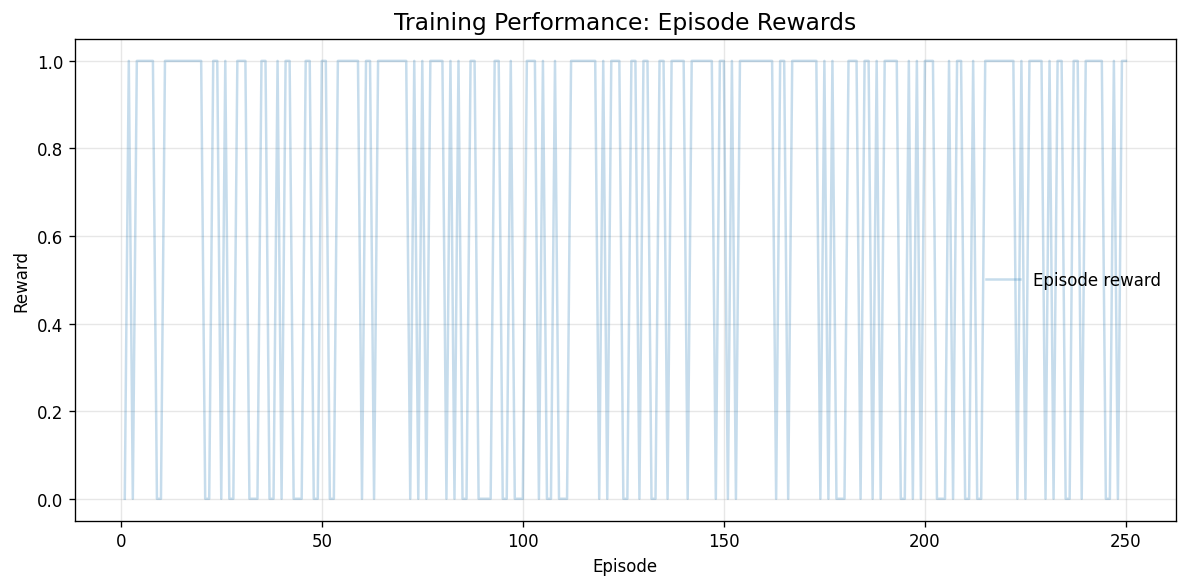

In [9]:
dpi     = 120       # figure resolution

r = np.asarray(episode_rewards, dtype=float)

cumsum = np.cumsum(np.insert(r, 0, 0))
smooth = (cumsum[num_episodes:] - cumsum[:-num_episodes]) / num_episodes
episodes_smooth = np.arange(len(smooth)) + num_episodes//2 + 1

plt.figure(figsize=(10, 5), dpi=dpi)
plt.plot(range(1, len(r) + 1), r, alpha=0.25, label='Episode reward')

plt.title('Training Performance: Episode Rewards', fontsize=14)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.legend(frameon=False)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Hyperparameter tuning
Some Reinforcement Learning algorithms have an abundance of parameters; especially in the territory of Deep Reinforcement Learning, where you could tune the batch size and even the neural network layout, amongst the learning rate and exploration rate.

Therefore, it is important that we are able to systematically tune these hyperparameters in an automated fashion, as the number of combinations of parameters and interdependent effects are too numerous to manually tune (aside from setting a good starting point). Tuning is an art in and of itself, and is a form of optimization. Luckily, many libraries exist for finding the optimal set of hyperparameters, using various different approaches such as genetic algorithms, in order to explore and exploit areas of the tuning state space that are promising automatically.

## How does it work?
Exactly how hyperparameter tuning chooses to select combinations of parameters, continue runs (also known as *sweeps*, each sweep having an unique combination of parameters) or stop early, is an art in and of itself. There are many methods and algorithms that are out of scope for this project, although it should be noted that we are not simply enumerating all possible parameters as in a grid search, for example instead we can choose to use a random search or Bayes search.

What we define is a tunable parameter, such as the following:
```python
        learning_rate   = dict(min=1e-5,  max=1e-2,  distribution="log_uniform_values"),
```
* **What it is:** a rule for the hyperparameter tuning library, stating it should *try out different learning-rates* during a hyperparameter sweep.
* **The range:** it may pick anything between **0.00001** and **0.01**.
* **How the picks are made:** not evenly spaced, but **log-uniformly**.

  * Think “pick a random exponent” rather than “pick a random number.”
  * Each order of magnitude (10⁻⁵ → 10⁻⁴ → 10⁻³ → 10⁻²) is equally likely.

Why log-uniform?

1. With learning rates, what matters is usually the *order of magnitude*, not the exact decimal.
2. A log-uniform draw therefore spends just as much effort exploring tiny values (which often work best) as it does larger ones.

In short: *“Try lots of learning-rates between 0.000 01 and 0.01, giving every magnitude the same chance, because we don’t yet know which size step the optimiser will like.”*

This is just one tunable parameter, and the problem of hyperparameter tuning is you have to select values for multiple hyperparameters at the same time, where hyperparameters are not always independent of each other, and you have limited compute time to run these experiments in. This is why specialised algorithms exist just for hyperparameter tuning.

## Weights and Biases
Weights and Biases (referred to commonly as W&B or WandB) is a standard tool used in both industry and academia for tracking (and storing) the results of experiments. In other words, Weights and Biases is an end-to-end developer platform that keeps every experiment, dataset, model checkpoint, and evaluation in a single, searchable workspace.

Specifically, we use it both as a hyperparameter tuning library and storing the results of experiments based on these hyperparameters.

You can find more information at: https://docs.wandb.ai/quickstart/

In [10]:
wandb.login() # See https://docs.wandb.ai/quickstart/

True

In [ ]:
def train_sweep() -> None:
    """  One full training run driven by a set of hyper-parameters coming
    from wandb.config. Logs metrics to W&B at the end of every episode.
    """
    with wandb.init(project="montyhall-ql") as run:
        cfg = run.config

        # 1. Converting the Weight & Biases Config -> Q Learning Config
        qcfg = QLearningConfig(
            learning_rate   = cfg.learning_rate,
            discount_factor = cfg.discount_factor,
            epsilon_start   = 1.0,
            epsilon_decay   = cfg.epsilon_decay,
            epsilon_min     = 0.05,
            max_steps_per_episode = 100,
            video_dir       = None
        )

        # 2️) Create env & agent
        env  = gym.make("MontyHall-v0", n_doors=3, n_cars=1, render_mode=None)
        env  = MontyHallDiscreteWrapper(env)
        agent = QLearningAgent(env, qcfg)

        # 3️) Run training loop
        episode_rewards, converged_ep, converged_t = agent.train(
            episodes     = 500,
            log_interval = 25,
        )

        # 4️) Log summary metrics & clean up
        wandb.log({
            "best_reward"      : max(episode_rewards),
            "converged_episode": converged_ep,
            "train_time_sec"   : converged_t,
        })
        env.close()

In [12]:
sweep_config = dict(
    name   = "montyhall-bayes",
    method = "bayes",                      # The search method used: grid | random | bayes. Random & Bayes work best.
    metric = dict(name="best_reward", goal="maximize"),
    parameters = dict(
        learning_rate   = dict(min=1e-5,  max=1e-2,  distribution="log_uniform_values"),
        discount_factor = dict(min=0.8,   max=0.999, distribution="uniform"),
        epsilon_decay   = dict(min=0.95,  max=0.9999,distribution="uniform"),
    ),
    early_terminate = dict(type="hyperband", min_iter=10),
)

sweep_id = wandb.sweep(sweep_config, project="montyhall-ql")
wandb.agent(sweep_id, function=train_sweep, count=30) # 30 trials

Create sweep with ID: y9nid08r
Sweep URL: https://wandb.ai/nightly/montyhall-ql/sweeps/y9nid08r


wandb: Agent Starting Run: 8mf1qhxb with config:
wandb: 	discount_factor: 0.9320140640787922
wandb: 	epsilon_decay: 0.9633270345394872
wandb: 	learning_rate: 0.00016903027448374191


2025-07-08 12:22:57.648 | INFO     | src.rl.tabular_q_learning:train:225 - Episode    25 | R: +0.0 | ε: 0.393
2025-07-08 12:22:57.658 | INFO     | src.rl.tabular_q_learning:train:225 - Episode    50 | R: +1.0 | ε: 0.154
2025-07-08 12:22:57.662 | INFO     | src.rl.tabular_q_learning:train:225 - Episode    75 | R: +1.0 | ε: 0.061
2025-07-08 12:22:57.664 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   100 | R: +1.0 | ε: 0.050
2025-07-08 12:22:57.671 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   125 | R: +1.0 | ε: 0.050
2025-07-08 12:22:57.679 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   150 | R: +1.0 | ε: 0.050
2025-07-08 12:22:57.685 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   175 | R: +1.0 | ε: 0.050
2025-07-08 12:22:57.690 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   200 | R: +1.0 | ε: 0.050
2025-07-08 12:22:57.696 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   225 | R: +1.0 | ε: 0.050
2025-07-08

best_reward,▁
converged_episode,▁
train_time_sec,▁
best_reward,1
converged_episode,-1
train_time_sec,0


wandb: Agent Starting Run: ygdc599v with config:
wandb: 	discount_factor: 0.8474526132290809
wandb: 	epsilon_decay: 0.9890755151144568
wandb: 	learning_rate: 3.177791935133551e-05


2025-07-08 12:23:02.919 | INFO     | src.rl.tabular_q_learning:train:225 - Episode    25 | R: +0.0 | ε: 0.760
2025-07-08 12:23:02.927 | INFO     | src.rl.tabular_q_learning:train:225 - Episode    50 | R: +1.0 | ε: 0.577
2025-07-08 12:23:02.932 | INFO     | src.rl.tabular_q_learning:train:225 - Episode    75 | R: +1.0 | ε: 0.439
2025-07-08 12:23:02.937 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   100 | R: +1.0 | ε: 0.333
2025-07-08 12:23:02.941 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   125 | R: +1.0 | ε: 0.253
2025-07-08 12:23:02.948 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   150 | R: +1.0 | ε: 0.192
2025-07-08 12:23:02.955 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   175 | R: +1.0 | ε: 0.146
2025-07-08 12:23:02.960 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   200 | R: +1.0 | ε: 0.111
2025-07-08 12:23:02.969 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   225 | R: +1.0 | ε: 0.084
2025-07-08

best_reward,▁
converged_episode,▁
train_time_sec,▁
best_reward,1
converged_episode,350
train_time_sec,0.08517


wandb: Agent Starting Run: 973470kf with config:
wandb: 	discount_factor: 0.8161558277950575
wandb: 	epsilon_decay: 0.9600894354382998
wandb: 	learning_rate: 0.008715191304648226


2025-07-08 12:23:08.275 | INFO     | src.rl.tabular_q_learning:train:225 - Episode    25 | R: +0.0 | ε: 0.361
2025-07-08 12:23:08.281 | INFO     | src.rl.tabular_q_learning:train:225 - Episode    50 | R: +1.0 | ε: 0.130
2025-07-08 12:23:08.286 | INFO     | src.rl.tabular_q_learning:train:225 - Episode    75 | R: +1.0 | ε: 0.050
2025-07-08 12:23:08.292 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   100 | R: +1.0 | ε: 0.050
2025-07-08 12:23:08.297 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   125 | R: +1.0 | ε: 0.050
2025-07-08 12:23:08.304 | SUCCESS  | src.rl.tabular_q_learning:train:236 - Converged at episode 144 after 0.03s
2025-07-08 12:23:08.306 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   150 | R: +1.0 | ε: 0.050
2025-07-08 12:23:08.312 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   175 | R: +1.0 | ε: 0.050
2025-07-08 12:23:08.317 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   200 | R: +1.0 | ε: 0.050
2025-07-

best_reward,▁
converged_episode,▁
train_time_sec,▁
best_reward,1
converged_episode,144
train_time_sec,0.0338


wandb: Agent Starting Run: sggo0bq5 with config:
wandb: 	discount_factor: 0.9039003345618832
wandb: 	epsilon_decay: 0.9809869964329752
wandb: 	learning_rate: 9.388592504444144e-05


2025-07-08 12:23:13.810 | INFO     | src.rl.tabular_q_learning:train:225 - Episode    25 | R: +1.0 | ε: 0.619
2025-07-08 12:23:13.816 | INFO     | src.rl.tabular_q_learning:train:225 - Episode    50 | R: +1.0 | ε: 0.383
2025-07-08 12:23:13.821 | INFO     | src.rl.tabular_q_learning:train:225 - Episode    75 | R: +1.0 | ε: 0.237
2025-07-08 12:23:13.821 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   100 | R: +1.0 | ε: 0.147
2025-07-08 12:23:13.832 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   125 | R: +1.0 | ε: 0.091
2025-07-08 12:23:13.836 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   150 | R: +1.0 | ε: 0.056
2025-07-08 12:23:13.845 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   175 | R: +1.0 | ε: 0.050
2025-07-08 12:23:13.850 | SUCCESS  | src.rl.tabular_q_learning:train:236 - Converged at episode 198 after 0.05s
2025-07-08 12:23:13.851 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   200 | R: +1.0 | ε: 0.050
2025-07-

best_reward,▁
converged_episode,▁
train_time_sec,▁
best_reward,1
converged_episode,198
train_time_sec,0.04517


wandb: Agent Starting Run: skm83985 with config:
wandb: 	discount_factor: 0.9355906775637972
wandb: 	epsilon_decay: 0.978703190032942
wandb: 	learning_rate: 2.7068078789549587e-05


2025-07-08 12:23:18.469 | INFO     | src.rl.tabular_q_learning:train:225 - Episode    25 | R: +0.0 | ε: 0.584
2025-07-08 12:23:18.476 | INFO     | src.rl.tabular_q_learning:train:225 - Episode    50 | R: +1.0 | ε: 0.341
2025-07-08 12:23:18.482 | INFO     | src.rl.tabular_q_learning:train:225 - Episode    75 | R: +1.0 | ε: 0.199
2025-07-08 12:23:18.487 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   100 | R: +1.0 | ε: 0.116
2025-07-08 12:23:18.495 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   125 | R: +1.0 | ε: 0.068
2025-07-08 12:23:18.502 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   150 | R: +1.0 | ε: 0.050
2025-07-08 12:23:18.508 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   175 | R: +1.0 | ε: 0.050
2025-07-08 12:23:18.516 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   200 | R: +1.0 | ε: 0.050
2025-07-08 12:23:18.523 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   225 | R: +1.0 | ε: 0.050
2025-07-08

best_reward,▁
converged_episode,▁
train_time_sec,▁
best_reward,1
converged_episode,394
train_time_sec,0.10381


wandb: Agent Starting Run: 1ipqno1n with config:
wandb: 	discount_factor: 0.8957504481780244
wandb: 	epsilon_decay: 0.9605790595898612
wandb: 	learning_rate: 3.352588858972616e-05


2025-07-08 12:23:23.710 | INFO     | src.rl.tabular_q_learning:train:225 - Episode    25 | R: +1.0 | ε: 0.366
2025-07-08 12:23:23.716 | INFO     | src.rl.tabular_q_learning:train:225 - Episode    50 | R: +1.0 | ε: 0.134
2025-07-08 12:23:23.721 | INFO     | src.rl.tabular_q_learning:train:225 - Episode    75 | R: +1.0 | ε: 0.050
2025-07-08 12:23:23.727 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   100 | R: +1.0 | ε: 0.050
2025-07-08 12:23:23.733 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   125 | R: +1.0 | ε: 0.050
2025-07-08 12:23:23.734 | SUCCESS  | src.rl.tabular_q_learning:train:236 - Converged at episode 125 after 0.03s
2025-07-08 12:23:23.739 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   150 | R: +1.0 | ε: 0.050
2025-07-08 12:23:23.747 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   175 | R: +1.0 | ε: 0.050
2025-07-08 12:23:23.752 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   200 | R: +1.0 | ε: 0.050
2025-07-

best_reward,▁
converged_episode,▁
train_time_sec,▁
best_reward,1
converged_episode,125
train_time_sec,0.02829


wandb: Agent Starting Run: f2ig7rqg with config:
wandb: 	discount_factor: 0.973098241342839
wandb: 	epsilon_decay: 0.958624007966254
wandb: 	learning_rate: 7.927510557954355e-05


2025-07-08 12:23:29.940 | INFO     | src.rl.tabular_q_learning:train:225 - Episode    25 | R: +1.0 | ε: 0.348
2025-07-08 12:23:29.947 | INFO     | src.rl.tabular_q_learning:train:225 - Episode    50 | R: +1.0 | ε: 0.121
2025-07-08 12:23:29.953 | INFO     | src.rl.tabular_q_learning:train:225 - Episode    75 | R: +1.0 | ε: 0.050
2025-07-08 12:23:29.959 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   100 | R: +1.0 | ε: 0.050
2025-07-08 12:23:29.967 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   125 | R: +1.0 | ε: 0.050
2025-07-08 12:23:29.974 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   150 | R: +1.0 | ε: 0.050
2025-07-08 12:23:29.977 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   175 | R: +1.0 | ε: 0.050
2025-07-08 12:23:29.987 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   200 | R: +1.0 | ε: 0.050
2025-07-08 12:23:29.996 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   225 | R: +1.0 | ε: 0.050
2025-07-08

best_reward,▁
converged_episode,▁
train_time_sec,▁
best_reward,1
converged_episode,234
train_time_sec,0.06613


wandb: Agent Starting Run: t6c30wis with config:
wandb: 	discount_factor: 0.9820689429587048
wandb: 	epsilon_decay: 0.953033581574832
wandb: 	learning_rate: 1.3530857682055183e-05


2025-07-08 12:23:35.449 | INFO     | src.rl.tabular_q_learning:train:225 - Episode    25 | R: +1.0 | ε: 0.300
2025-07-08 12:23:35.457 | INFO     | src.rl.tabular_q_learning:train:225 - Episode    50 | R: +1.0 | ε: 0.090
2025-07-08 12:23:35.461 | INFO     | src.rl.tabular_q_learning:train:225 - Episode    75 | R: +1.0 | ε: 0.050
2025-07-08 12:23:35.464 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   100 | R: +1.0 | ε: 0.050
2025-07-08 12:23:35.470 | SUCCESS  | src.rl.tabular_q_learning:train:236 - Converged at episode 121 after 0.03s
2025-07-08 12:23:35.470 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   125 | R: +1.0 | ε: 0.050
2025-07-08 12:23:35.477 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   150 | R: +1.0 | ε: 0.050
2025-07-08 12:23:35.486 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   175 | R: +1.0 | ε: 0.050
2025-07-08 12:23:35.491 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   200 | R: +1.0 | ε: 0.050
2025-07-

best_reward,▁
converged_episode,▁
train_time_sec,▁
best_reward,1
converged_episode,121
train_time_sec,0.02551


wandb: Agent Starting Run: zzqzwicq with config:
wandb: 	discount_factor: 0.9640415021108276
wandb: 	epsilon_decay: 0.9650623685265648
wandb: 	learning_rate: 0.00018055466600221004


2025-07-08 12:23:40.715 | INFO     | src.rl.tabular_q_learning:train:225 - Episode    25 | R: +0.0 | ε: 0.411
2025-07-08 12:23:40.722 | INFO     | src.rl.tabular_q_learning:train:225 - Episode    50 | R: +1.0 | ε: 0.169
2025-07-08 12:23:40.726 | INFO     | src.rl.tabular_q_learning:train:225 - Episode    75 | R: +1.0 | ε: 0.069
2025-07-08 12:23:40.730 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   100 | R: +1.0 | ε: 0.050
2025-07-08 12:23:40.737 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   125 | R: +1.0 | ε: 0.050
2025-07-08 12:23:40.742 | SUCCESS  | src.rl.tabular_q_learning:train:236 - Converged at episode 139 after 0.03s
2025-07-08 12:23:40.746 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   150 | R: +1.0 | ε: 0.050
2025-07-08 12:23:40.751 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   175 | R: +1.0 | ε: 0.050
2025-07-08 12:23:40.757 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   200 | R: +1.0 | ε: 0.050
2025-07-

best_reward,▁
converged_episode,▁
train_time_sec,▁
best_reward,1
converged_episode,139
train_time_sec,0.03074


wandb: Agent Starting Run: uxu1324p with config:
wandb: 	discount_factor: 0.8567801596632719
wandb: 	epsilon_decay: 0.978663256670618
wandb: 	learning_rate: 2.264835305595028e-05


2025-07-08 12:23:45.755 | INFO     | src.rl.tabular_q_learning:train:225 - Episode    25 | R: +1.0 | ε: 0.583
2025-07-08 12:23:45.759 | INFO     | src.rl.tabular_q_learning:train:225 - Episode    50 | R: +1.0 | ε: 0.340
2025-07-08 12:23:45.766 | INFO     | src.rl.tabular_q_learning:train:225 - Episode    75 | R: +1.0 | ε: 0.198
2025-07-08 12:23:45.772 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   100 | R: +1.0 | ε: 0.116
2025-07-08 12:23:45.778 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   125 | R: +1.0 | ε: 0.067
2025-07-08 12:23:45.786 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   150 | R: +1.0 | ε: 0.050
2025-07-08 12:23:45.789 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   175 | R: +1.0 | ε: 0.050
2025-07-08 12:23:45.794 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   200 | R: +1.0 | ε: 0.050
2025-07-08 12:23:45.803 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   225 | R: +1.0 | ε: 0.050
2025-07-08

best_reward,▁
converged_episode,▁
train_time_sec,▁
best_reward,1
converged_episode,-1
train_time_sec,0


wandb: Agent Starting Run: m9spw6wb with config:
wandb: 	discount_factor: 0.8652637570172101
wandb: 	epsilon_decay: 0.9610636568623608
wandb: 	learning_rate: 0.00021834740836167323


2025-07-08 12:23:51.171 | INFO     | src.rl.tabular_q_learning:train:225 - Episode    25 | R: +0.0 | ε: 0.371
2025-07-08 12:23:51.175 | INFO     | src.rl.tabular_q_learning:train:225 - Episode    50 | R: +1.0 | ε: 0.137
2025-07-08 12:23:51.178 | INFO     | src.rl.tabular_q_learning:train:225 - Episode    75 | R: +1.0 | ε: 0.051
2025-07-08 12:23:51.186 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   100 | R: +1.0 | ε: 0.050
2025-07-08 12:23:51.191 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   125 | R: +1.0 | ε: 0.050
2025-07-08 12:23:51.198 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   150 | R: +1.0 | ε: 0.050
2025-07-08 12:23:51.205 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   175 | R: +1.0 | ε: 0.050
2025-07-08 12:23:51.210 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   200 | R: +1.0 | ε: 0.050
2025-07-08 12:23:51.216 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   225 | R: +1.0 | ε: 0.050
2025-07-08

best_reward,▁
converged_episode,▁
train_time_sec,▁
best_reward,1
converged_episode,234
train_time_sec,0.05279


wandb: Agent Starting Run: fh4dw99v with config:
wandb: 	discount_factor: 0.9509917393522088
wandb: 	epsilon_decay: 0.9709051320106366
wandb: 	learning_rate: 5.636324545343599e-05


2025-07-08 12:23:56.590 | INFO     | src.rl.tabular_q_learning:train:225 - Episode    25 | R: +1.0 | ε: 0.478
2025-07-08 12:23:56.595 | INFO     | src.rl.tabular_q_learning:train:225 - Episode    50 | R: +1.0 | ε: 0.228
2025-07-08 12:23:56.598 | INFO     | src.rl.tabular_q_learning:train:225 - Episode    75 | R: +1.0 | ε: 0.109
2025-07-08 12:23:56.598 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   100 | R: +1.0 | ε: 0.052
2025-07-08 12:23:56.610 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   125 | R: +1.0 | ε: 0.050
2025-07-08 12:23:56.616 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   150 | R: +1.0 | ε: 0.050
2025-07-08 12:23:56.621 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   175 | R: +1.0 | ε: 0.050
2025-07-08 12:23:56.627 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   200 | R: +1.0 | ε: 0.050
2025-07-08 12:23:56.633 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   225 | R: +1.0 | ε: 0.050
2025-07-08

best_reward,▁
converged_episode,▁
train_time_sec,▁
best_reward,1
converged_episode,371
train_time_sec,0.08418


wandb: Agent Starting Run: h806ucgk with config:
wandb: 	discount_factor: 0.9663071619266774
wandb: 	epsilon_decay: 0.951086278326894
wandb: 	learning_rate: 0.0011359672561686907


2025-07-08 12:24:01.827 | INFO     | src.rl.tabular_q_learning:train:225 - Episode    25 | R: +1.0 | ε: 0.285
2025-07-08 12:24:01.833 | INFO     | src.rl.tabular_q_learning:train:225 - Episode    50 | R: +1.0 | ε: 0.081
2025-07-08 12:24:01.839 | INFO     | src.rl.tabular_q_learning:train:225 - Episode    75 | R: +1.0 | ε: 0.050
2025-07-08 12:24:01.843 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   100 | R: +1.0 | ε: 0.050
2025-07-08 12:24:01.852 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   125 | R: +1.0 | ε: 0.050
2025-07-08 12:24:01.856 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   150 | R: +1.0 | ε: 0.050
2025-07-08 12:24:01.865 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   175 | R: +1.0 | ε: 0.050
2025-07-08 12:24:01.872 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   200 | R: +1.0 | ε: 0.050
2025-07-08 12:24:01.882 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   225 | R: +1.0 | ε: 0.050
2025-07-08

best_reward,▁
converged_episode,▁
train_time_sec,▁
best_reward,1
converged_episode,-1
train_time_sec,0


wandb: Agent Starting Run: d1y8tb68 with config:
wandb: 	discount_factor: 0.8019427999509405
wandb: 	epsilon_decay: 0.978146541353467
wandb: 	learning_rate: 4.457611794898646e-05


2025-07-08 12:24:08.117 | INFO     | src.rl.tabular_q_learning:train:225 - Episode    25 | R: +1.0 | ε: 0.576
2025-07-08 12:24:08.123 | INFO     | src.rl.tabular_q_learning:train:225 - Episode    50 | R: +1.0 | ε: 0.331
2025-07-08 12:24:08.132 | INFO     | src.rl.tabular_q_learning:train:225 - Episode    75 | R: +1.0 | ε: 0.191
2025-07-08 12:24:08.141 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   100 | R: +1.0 | ε: 0.110
2025-07-08 12:24:08.149 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   125 | R: +1.0 | ε: 0.063
2025-07-08 12:24:08.158 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   150 | R: +1.0 | ε: 0.050
2025-07-08 12:24:08.166 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   175 | R: +1.0 | ε: 0.050
2025-07-08 12:24:08.179 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   200 | R: +1.0 | ε: 0.050
2025-07-08 12:24:08.186 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   225 | R: +1.0 | ε: 0.050
2025-07-08

best_reward,▁
converged_episode,▁
train_time_sec,▁
best_reward,1
converged_episode,418
train_time_sec,0.13783


wandb: Agent Starting Run: 6ku4qa7p with config:
wandb: 	discount_factor: 0.8712216991287207
wandb: 	epsilon_decay: 0.9931993235919048
wandb: 	learning_rate: 0.0004318870241730845


2025-07-08 12:24:13.470 | INFO     | src.rl.tabular_q_learning:train:225 - Episode    25 | R: +1.0 | ε: 0.843
2025-07-08 12:24:13.477 | INFO     | src.rl.tabular_q_learning:train:225 - Episode    50 | R: +1.0 | ε: 0.711
2025-07-08 12:24:13.484 | INFO     | src.rl.tabular_q_learning:train:225 - Episode    75 | R: +0.0 | ε: 0.599
2025-07-08 12:24:13.492 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   100 | R: +1.0 | ε: 0.505
2025-07-08 12:24:13.499 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   125 | R: +1.0 | ε: 0.426
2025-07-08 12:24:13.508 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   150 | R: +1.0 | ε: 0.359
2025-07-08 12:24:13.518 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   175 | R: +1.0 | ε: 0.303
2025-07-08 12:24:13.527 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   200 | R: +1.0 | ε: 0.255
2025-07-08 12:24:13.538 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   225 | R: +1.0 | ε: 0.215
2025-07-08

best_reward,▁
converged_episode,▁
train_time_sec,▁
best_reward,1
converged_episode,-1
train_time_sec,0


wandb: Agent Starting Run: pe7mqwoq with config:
wandb: 	discount_factor: 0.9898668351660084
wandb: 	epsilon_decay: 0.99491637281278
wandb: 	learning_rate: 0.005828978567889354


2025-07-08 12:24:18.656 | INFO     | src.rl.tabular_q_learning:train:225 - Episode    25 | R: +0.0 | ε: 0.880
2025-07-08 12:24:18.663 | INFO     | src.rl.tabular_q_learning:train:225 - Episode    50 | R: +1.0 | ε: 0.775
2025-07-08 12:24:18.670 | INFO     | src.rl.tabular_q_learning:train:225 - Episode    75 | R: +0.0 | ε: 0.682
2025-07-08 12:24:18.675 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   100 | R: +1.0 | ε: 0.601
2025-07-08 12:24:18.680 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   125 | R: +0.0 | ε: 0.529
2025-07-08 12:24:18.690 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   150 | R: +1.0 | ε: 0.466
2025-07-08 12:24:18.698 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   175 | R: +1.0 | ε: 0.410
2025-07-08 12:24:18.702 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   200 | R: +1.0 | ε: 0.361
2025-07-08 12:24:18.707 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   225 | R: +1.0 | ε: 0.318
2025-07-08

best_reward,▁
converged_episode,▁
train_time_sec,▁
best_reward,1
converged_episode,-1
train_time_sec,0


wandb: Agent Starting Run: 5fe93kxf with config:
wandb: 	discount_factor: 0.8326985049703338
wandb: 	epsilon_decay: 0.9851499781268076
wandb: 	learning_rate: 0.0032155847535190185


2025-07-08 12:24:23.762 | INFO     | src.rl.tabular_q_learning:train:225 - Episode    25 | R: +0.0 | ε: 0.688
2025-07-08 12:24:23.769 | INFO     | src.rl.tabular_q_learning:train:225 - Episode    50 | R: +1.0 | ε: 0.473
2025-07-08 12:24:23.774 | INFO     | src.rl.tabular_q_learning:train:225 - Episode    75 | R: +0.0 | ε: 0.326
2025-07-08 12:24:23.777 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   100 | R: +1.0 | ε: 0.224
2025-07-08 12:24:23.785 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   125 | R: +1.0 | ε: 0.154
2025-07-08 12:24:23.789 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   150 | R: +1.0 | ε: 0.106
2025-07-08 12:24:23.796 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   175 | R: +1.0 | ε: 0.073
2025-07-08 12:24:23.801 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   200 | R: +1.0 | ε: 0.050
2025-07-08 12:24:23.808 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   225 | R: +1.0 | ε: 0.050
2025-07-08

best_reward,▁
converged_episode,▁
train_time_sec,▁
best_reward,1
converged_episode,371
train_time_sec,0.09132


wandb: Agent Starting Run: 9351tm1q with config:
wandb: 	discount_factor: 0.998912635507164
wandb: 	epsilon_decay: 0.9857915696382678
wandb: 	learning_rate: 0.003057198170426844


2025-07-08 12:24:29.020 | INFO     | src.rl.tabular_q_learning:train:225 - Episode    25 | R: +0.0 | ε: 0.699
2025-07-08 12:24:29.027 | INFO     | src.rl.tabular_q_learning:train:225 - Episode    50 | R: +1.0 | ε: 0.489
2025-07-08 12:24:29.033 | INFO     | src.rl.tabular_q_learning:train:225 - Episode    75 | R: +1.0 | ε: 0.342
2025-07-08 12:24:29.038 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   100 | R: +1.0 | ε: 0.239
2025-07-08 12:24:29.045 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   125 | R: +1.0 | ε: 0.167
2025-07-08 12:24:29.050 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   150 | R: +1.0 | ε: 0.117
2025-07-08 12:24:29.056 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   175 | R: +1.0 | ε: 0.082
2025-07-08 12:24:29.062 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   200 | R: +1.0 | ε: 0.057
2025-07-08 12:24:29.068 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   225 | R: +1.0 | ε: 0.050
2025-07-08

best_reward,▁
converged_episode,▁
train_time_sec,▁
best_reward,1
converged_episode,-1
train_time_sec,0


wandb: Agent Starting Run: mkfbb919 with config:
wandb: 	discount_factor: 0.8496350540034602
wandb: 	epsilon_decay: 0.9679786128029734
wandb: 	learning_rate: 0.00034051601024434754


2025-07-08 12:24:34.334 | INFO     | src.rl.tabular_q_learning:train:225 - Episode    25 | R: +0.0 | ε: 0.443
2025-07-08 12:24:34.338 | INFO     | src.rl.tabular_q_learning:train:225 - Episode    50 | R: +1.0 | ε: 0.196
2025-07-08 12:24:34.346 | INFO     | src.rl.tabular_q_learning:train:225 - Episode    75 | R: +1.0 | ε: 0.087
2025-07-08 12:24:34.350 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   100 | R: +1.0 | ε: 0.050
2025-07-08 12:24:34.357 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   125 | R: +1.0 | ε: 0.050
2025-07-08 12:24:34.367 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   150 | R: +1.0 | ε: 0.050
2025-07-08 12:24:34.371 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   175 | R: +1.0 | ε: 0.050
2025-07-08 12:24:34.378 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   200 | R: +1.0 | ε: 0.050
2025-07-08 12:24:34.386 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   225 | R: +1.0 | ε: 0.050
2025-07-08

best_reward,▁
converged_episode,▁
train_time_sec,▁
best_reward,1
converged_episode,248
train_time_sec,0.06098


wandb: Agent Starting Run: abcjdvkw with config:
wandb: 	discount_factor: 0.9547647436290936
wandb: 	epsilon_decay: 0.9827452467333186
wandb: 	learning_rate: 0.0046700217671368175


2025-07-08 12:24:39.715 | INFO     | src.rl.tabular_q_learning:train:225 - Episode    25 | R: +0.0 | ε: 0.647
2025-07-08 12:24:39.715 | INFO     | src.rl.tabular_q_learning:train:225 - Episode    50 | R: +1.0 | ε: 0.419
2025-07-08 12:24:39.732 | INFO     | src.rl.tabular_q_learning:train:225 - Episode    75 | R: +1.0 | ε: 0.271
2025-07-08 12:24:39.736 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   100 | R: +1.0 | ε: 0.175
2025-07-08 12:24:39.743 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   125 | R: +1.0 | ε: 0.114
2025-07-08 12:24:39.748 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   150 | R: +1.0 | ε: 0.073
2025-07-08 12:24:39.752 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   175 | R: +1.0 | ε: 0.050
2025-07-08 12:24:39.763 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   200 | R: +1.0 | ε: 0.050
2025-07-08 12:24:39.765 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   225 | R: +1.0 | ε: 0.050
2025-07-08

best_reward,▁
converged_episode,▁
train_time_sec,▁
best_reward,1
converged_episode,418
train_time_sec,0.10239


wandb: Agent Starting Run: zfv2glq1 with config:
wandb: 	discount_factor: 0.970820590775128
wandb: 	epsilon_decay: 0.95241361616306
wandb: 	learning_rate: 0.0002355771258593976


2025-07-08 12:24:45.440 | INFO     | src.rl.tabular_q_learning:train:225 - Episode    25 | R: +1.0 | ε: 0.296
2025-07-08 12:24:45.440 | INFO     | src.rl.tabular_q_learning:train:225 - Episode    50 | R: +1.0 | ε: 0.087
2025-07-08 12:24:45.453 | INFO     | src.rl.tabular_q_learning:train:225 - Episode    75 | R: +1.0 | ε: 0.050
2025-07-08 12:24:45.459 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   100 | R: +1.0 | ε: 0.050
2025-07-08 12:24:45.465 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   125 | R: +1.0 | ε: 0.050
2025-07-08 12:24:45.467 | SUCCESS  | src.rl.tabular_q_learning:train:236 - Converged at episode 133 after 0.03s
2025-07-08 12:24:45.471 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   150 | R: +1.0 | ε: 0.050
2025-07-08 12:24:45.476 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   175 | R: +1.0 | ε: 0.050
2025-07-08 12:24:45.476 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   200 | R: +1.0 | ε: 0.050
2025-07-

best_reward,▁
converged_episode,▁
train_time_sec,▁
best_reward,1
converged_episode,133
train_time_sec,0.02811


wandb: Agent Starting Run: xg8w6p3s with config:
wandb: 	discount_factor: 0.9538183600569295
wandb: 	epsilon_decay: 0.9851465420700252
wandb: 	learning_rate: 2.254896837874753e-05


2025-07-08 12:24:52.390 | INFO     | src.rl.tabular_q_learning:train:225 - Episode    25 | R: +0.0 | ε: 0.688
2025-07-08 12:24:52.395 | INFO     | src.rl.tabular_q_learning:train:225 - Episode    50 | R: +1.0 | ε: 0.473
2025-07-08 12:24:52.402 | INFO     | src.rl.tabular_q_learning:train:225 - Episode    75 | R: +0.0 | ε: 0.326
2025-07-08 12:24:52.407 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   100 | R: +1.0 | ε: 0.224
2025-07-08 12:24:52.414 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   125 | R: +1.0 | ε: 0.154
2025-07-08 12:24:52.418 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   150 | R: +1.0 | ε: 0.106
2025-07-08 12:24:52.425 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   175 | R: +1.0 | ε: 0.073
2025-07-08 12:24:52.432 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   200 | R: +1.0 | ε: 0.050
2025-07-08 12:24:52.436 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   225 | R: +1.0 | ε: 0.050
2025-07-08

best_reward,▁
converged_episode,▁
train_time_sec,▁
best_reward,1
converged_episode,394
train_time_sec,0.0939


wandb: Agent Starting Run: aqyrq137 with config:
wandb: 	discount_factor: 0.8177348735918408
wandb: 	epsilon_decay: 0.9701228586400026
wandb: 	learning_rate: 4.023326745952532e-05


2025-07-08 12:24:56.791 | INFO     | src.rl.tabular_q_learning:train:225 - Episode    25 | R: +1.0 | ε: 0.468
2025-07-08 12:24:56.796 | INFO     | src.rl.tabular_q_learning:train:225 - Episode    50 | R: +1.0 | ε: 0.219
2025-07-08 12:24:56.796 | INFO     | src.rl.tabular_q_learning:train:225 - Episode    75 | R: +1.0 | ε: 0.103
2025-07-08 12:24:56.803 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   100 | R: +1.0 | ε: 0.050
2025-07-08 12:24:56.812 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   125 | R: +1.0 | ε: 0.050
2025-07-08 12:24:56.819 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   150 | R: +1.0 | ε: 0.050
2025-07-08 12:24:56.826 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   175 | R: +1.0 | ε: 0.050
2025-07-08 12:24:56.832 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   200 | R: +1.0 | ε: 0.050
2025-07-08 12:24:56.838 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   225 | R: +1.0 | ε: 0.050
2025-07-08

best_reward,▁
converged_episode,▁
train_time_sec,▁
best_reward,1
converged_episode,371
train_time_sec,0.09043


wandb: Agent Starting Run: vwp748lw with config:
wandb: 	discount_factor: 0.8088473411123643
wandb: 	epsilon_decay: 0.96237112826234
wandb: 	learning_rate: 0.0022644380133819805


2025-07-08 12:25:02.190 | INFO     | src.rl.tabular_q_learning:train:225 - Episode    25 | R: +0.0 | ε: 0.383
2025-07-08 12:25:02.196 | INFO     | src.rl.tabular_q_learning:train:225 - Episode    50 | R: +1.0 | ε: 0.147
2025-07-08 12:25:02.203 | INFO     | src.rl.tabular_q_learning:train:225 - Episode    75 | R: +1.0 | ε: 0.056
2025-07-08 12:25:02.207 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   100 | R: +1.0 | ε: 0.050
2025-07-08 12:25:02.214 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   125 | R: +1.0 | ε: 0.050
2025-07-08 12:25:02.219 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   150 | R: +1.0 | ε: 0.050
2025-07-08 12:25:02.224 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   175 | R: +1.0 | ε: 0.050
2025-07-08 12:25:02.226 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   200 | R: +1.0 | ε: 0.050
2025-07-08 12:25:02.236 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   225 | R: +1.0 | ε: 0.050
2025-07-08

best_reward,▁
converged_episode,▁
train_time_sec,▁
best_reward,1
converged_episode,-1
train_time_sec,0


wandb: Agent Starting Run: 801lae58 with config:
wandb: 	discount_factor: 0.9335897176625362
wandb: 	epsilon_decay: 0.9950782053671584
wandb: 	learning_rate: 0.008147763733846554


2025-07-08 12:25:07.450 | INFO     | src.rl.tabular_q_learning:train:225 - Episode    25 | R: +0.0 | ε: 0.884
2025-07-08 12:25:07.455 | INFO     | src.rl.tabular_q_learning:train:225 - Episode    50 | R: +1.0 | ε: 0.781
2025-07-08 12:25:07.464 | INFO     | src.rl.tabular_q_learning:train:225 - Episode    75 | R: +0.0 | ε: 0.691
2025-07-08 12:25:07.471 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   100 | R: +1.0 | ε: 0.611
2025-07-08 12:25:07.478 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   125 | R: +0.0 | ε: 0.540
2025-07-08 12:25:07.483 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   150 | R: +1.0 | ε: 0.477
2025-07-08 12:25:07.495 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   175 | R: +0.0 | ε: 0.422
2025-07-08 12:25:07.496 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   200 | R: +1.0 | ε: 0.373
2025-07-08 12:25:07.511 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   225 | R: +1.0 | ε: 0.330
2025-07-08

best_reward,▁
converged_episode,▁
train_time_sec,▁
best_reward,1
converged_episode,-1
train_time_sec,0


wandb: Agent Starting Run: jzcukpc2 with config:
wandb: 	discount_factor: 0.8596660022774031
wandb: 	epsilon_decay: 0.983959073873028
wandb: 	learning_rate: 0.0001400278104473869


2025-07-08 12:25:12.870 | INFO     | src.rl.tabular_q_learning:train:225 - Episode    25 | R: +1.0 | ε: 0.667
2025-07-08 12:25:12.881 | INFO     | src.rl.tabular_q_learning:train:225 - Episode    50 | R: +1.0 | ε: 0.446
2025-07-08 12:25:12.888 | INFO     | src.rl.tabular_q_learning:train:225 - Episode    75 | R: +1.0 | ε: 0.297
2025-07-08 12:25:12.893 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   100 | R: +1.0 | ε: 0.198
2025-07-08 12:25:12.898 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   125 | R: +1.0 | ε: 0.132
2025-07-08 12:25:12.907 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   150 | R: +1.0 | ε: 0.088
2025-07-08 12:25:12.913 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   175 | R: +1.0 | ε: 0.059
2025-07-08 12:25:12.918 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   200 | R: +1.0 | ε: 0.050
2025-07-08 12:25:12.927 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   225 | R: +1.0 | ε: 0.050
2025-07-08

best_reward,▁
converged_episode,▁
train_time_sec,▁
best_reward,1
converged_episode,394
train_time_sec,0.1042


wandb: Agent Starting Run: f2trz9pt with config:
wandb: 	discount_factor: 0.976450106785821
wandb: 	epsilon_decay: 0.9582160481480064
wandb: 	learning_rate: 0.00015604842928113692


2025-07-08 12:25:18.191 | INFO     | src.rl.tabular_q_learning:train:225 - Episode    25 | R: +1.0 | ε: 0.344
2025-07-08 12:25:18.198 | INFO     | src.rl.tabular_q_learning:train:225 - Episode    50 | R: +1.0 | ε: 0.118
2025-07-08 12:25:18.206 | INFO     | src.rl.tabular_q_learning:train:225 - Episode    75 | R: +1.0 | ε: 0.050
2025-07-08 12:25:18.211 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   100 | R: +1.0 | ε: 0.050
2025-07-08 12:25:18.217 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   125 | R: +1.0 | ε: 0.050
2025-07-08 12:25:18.227 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   150 | R: +1.0 | ε: 0.050
2025-07-08 12:25:18.234 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   175 | R: +1.0 | ε: 0.050
2025-07-08 12:25:18.239 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   200 | R: +1.0 | ε: 0.050
2025-07-08 12:25:18.248 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   225 | R: +1.0 | ε: 0.050
2025-07-08

best_reward,▁
converged_episode,▁
train_time_sec,▁
best_reward,1
converged_episode,346
train_time_sec,0.09649


wandb: Agent Starting Run: evv630w7 with config:
wandb: 	discount_factor: 0.926922896184746
wandb: 	epsilon_decay: 0.9547566175257344
wandb: 	learning_rate: 0.002531806096348185


2025-07-08 12:25:23.684 | INFO     | src.rl.tabular_q_learning:train:225 - Episode    25 | R: +1.0 | ε: 0.314
2025-07-08 12:25:23.698 | INFO     | src.rl.tabular_q_learning:train:225 - Episode    50 | R: +1.0 | ε: 0.099
2025-07-08 12:25:23.703 | INFO     | src.rl.tabular_q_learning:train:225 - Episode    75 | R: +1.0 | ε: 0.050
2025-07-08 12:25:23.712 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   100 | R: +1.0 | ε: 0.050
2025-07-08 12:25:23.719 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   125 | R: +1.0 | ε: 0.050
2025-07-08 12:25:23.721 | SUCCESS  | src.rl.tabular_q_learning:train:236 - Converged at episode 133 after 0.04s
2025-07-08 12:25:23.726 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   150 | R: +1.0 | ε: 0.050
2025-07-08 12:25:23.731 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   175 | R: +1.0 | ε: 0.050
2025-07-08 12:25:23.736 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   200 | R: +1.0 | ε: 0.050
2025-07-

best_reward,▁
converged_episode,▁
train_time_sec,▁
best_reward,1
converged_episode,133
train_time_sec,0.03755


wandb: Agent Starting Run: m1vxyi5z with config:
wandb: 	discount_factor: 0.9199196700975204
wandb: 	epsilon_decay: 0.9959496271212284
wandb: 	learning_rate: 0.0075310023770832355


2025-07-08 12:25:28.979 | INFO     | src.rl.tabular_q_learning:train:225 - Episode    25 | R: +0.0 | ε: 0.904
2025-07-08 12:25:28.989 | INFO     | src.rl.tabular_q_learning:train:225 - Episode    50 | R: +1.0 | ε: 0.816
2025-07-08 12:25:28.996 | INFO     | src.rl.tabular_q_learning:train:225 - Episode    75 | R: +0.0 | ε: 0.738
2025-07-08 12:25:28.999 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   100 | R: +1.0 | ε: 0.666
2025-07-08 12:25:29.011 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   125 | R: +1.0 | ε: 0.602
2025-07-08 12:25:29.019 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   150 | R: +1.0 | ε: 0.544
2025-07-08 12:25:29.027 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   175 | R: +1.0 | ε: 0.492
2025-07-08 12:25:29.035 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   200 | R: +1.0 | ε: 0.444
2025-07-08 12:25:29.042 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   225 | R: +1.0 | ε: 0.401
2025-07-08

best_reward,▁
converged_episode,▁
train_time_sec,▁
best_reward,1
converged_episode,-1
train_time_sec,0


wandb: Agent Starting Run: o889krs2 with config:
wandb: 	discount_factor: 0.953422520597212
wandb: 	epsilon_decay: 0.9665424957161276
wandb: 	learning_rate: 1.1341730277056614e-05


2025-07-08 12:25:34.383 | INFO     | src.rl.tabular_q_learning:train:225 - Episode    25 | R: +1.0 | ε: 0.427
2025-07-08 12:25:34.390 | INFO     | src.rl.tabular_q_learning:train:225 - Episode    50 | R: +1.0 | ε: 0.182
2025-07-08 12:25:34.394 | INFO     | src.rl.tabular_q_learning:train:225 - Episode    75 | R: +1.0 | ε: 0.078
2025-07-08 12:25:34.404 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   100 | R: +1.0 | ε: 0.050
2025-07-08 12:25:34.410 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   125 | R: +1.0 | ε: 0.050
2025-07-08 12:25:34.417 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   150 | R: +1.0 | ε: 0.050
2025-07-08 12:25:34.423 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   175 | R: +1.0 | ε: 0.050
2025-07-08 12:25:34.429 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   200 | R: +1.0 | ε: 0.050
2025-07-08 12:25:34.439 | INFO     | src.rl.tabular_q_learning:train:225 - Episode   225 | R: +1.0 | ε: 0.050
2025-07-08

best_reward,▁
converged_episode,▁
train_time_sec,▁
best_reward,1
converged_episode,248
train_time_sec,0.06932


# Viewing the results
If you navigate to the sweep URL on Weights & Biases (wandb.ai), you'll see the data logged in various formats such as table and graphs, where you can visualise the hyperparameter space. You should see something like the following:

![wandb dashboard](assets/wandb.png)

Explore this dashboard fully for more information on how the tuning and sweeps went.

We can programmatically print the best hyperparameters as below:

In [25]:
api   = wandb.Api()
sweep = api.sweep(f"{os.getenv("WANDB_ENTITY")}/montyhall-ql/{sweep_id}")
best  = max(sweep.runs, key=lambda r: r.summary.get("best_reward", float("-inf")))



# ── 2. Rank runs: highest reward FIRST, then earliest convergence ────────
def sort_key(run):
    # Reward: want *larger* → negate so larger becomes “smaller” for sort()
    reward = -run.summary.get("best_reward", float("-inf"))
    # Convergence episode: want *smaller*
    conv_ep = run.summary.get("converged_episode", float("inf"))
    return (reward, conv_ep)

best_run = min(sweep.runs, key=sort_key)

# ── 3. Print the winner’s details ────────────────────────────────────────
print(f"🏆  {best_run.name}")
print(f"   • best_reward       : {best_run.summary['best_reward']}")
print(f"   • converged_episode : {best_run.summary['converged_episode']}")
print(f"   • hyperparams:", {k: best_run.config[k] for k in ('learning_rate',
                                                    'discount_factor',
                                                    'epsilon_decay')})

🏆  flowing-sweep-29
   • best_reward       : 1
   • converged_episode : -1
   • hyperparams: {'learning_rate': 0.0075310023770832355, 'discount_factor': 0.9199196700975204, 'epsilon_decay': 0.9959496271212284}


# Conclusion

In this notebook, we learnt the following:
* Instantiating environments with the Gymnasium library
* Deployed our previously implemented Reinforcement Learning algorithm, Tabular Q Learning, on the aforementioned environment 
* How to visualise training performance through plotting with Matplotlib
* How to perform hyperparameter tuning
* Followed best practices for experiment tracking and storage of results in an archival manner

## Extension activity
As an extension to this, you can consider the following task:
> Based on our trained RL algorithm, using optimal hyperparameters above, how often is it optimal to switch or stay with the first selected door? 

You can do this by using the `.test()` method and collecting some basic statistics using the rolled-out policy.

## Next notebook
In the next notebook (3. Environment Creation), we will learn how to create your own environment. This allows solving any arbitrary combinatorial problem, allowing you to formally define the "problem space" for any problem you can think of. 